## Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import linear_model, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import sentence_transformers
from wordcloud import WordCloud

## Load Dataset 

In [3]:
df = pd.read_csv("Individual 1 choice A spam (Text).csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Visualisation of Spam and Non-Spam Messages

In [4]:
# Generate Word Cloud for Spam and Non-Spam Messages
def generate_wordcloud(df):
    spam_words = ' '.join(df[df['Category'] == 'spam']['Message'])
    non_spam_words = ' '.join(df[df['Category'] == 'ham']['Message'])
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(WordCloud(width=500, height=300, background_color='black').generate(spam_words))
    ax[0].axis('off')
    ax[0].set_title('Spam Messages Word Cloud')
    
    ax[1].imshow(WordCloud(width=500, height=300, background_color='white').generate(non_spam_words))
    ax[1].axis('off')
    ax[1].set_title('Non-Spam Messages Word Cloud')
    
    plt.show()

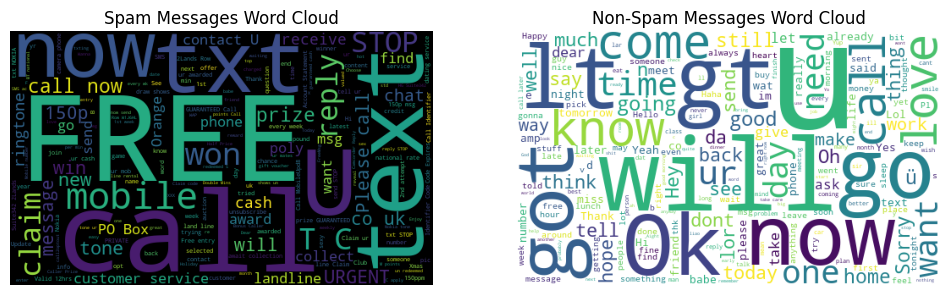

In [5]:
generate_wordcloud(df)

## Preprocessing

In [6]:
X = df["Message"]
Y = df["Category"]

## Pre-define Model and Accuracy Visualisation functions

In [7]:
# Plot Confusion Matrix
def plot_confusion_matrix(Y_test, pred, title="Confusion Matrix"):
    cm = confusion_matrix(Y_test, pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot ROC Curve
def plot_roc_curve(Y_test, Y_probs):
    fpr, tpr, _ = roc_curve(Y_test, Y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Plot Precision-Recall Curve
def plot_precision_recall(Y_test, Y_probs):
    precision, recall, _ = precision_recall_curve(Y_test, Y_probs)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

## Count Vectorizer

### Vectorization using CountVectorizer and train-test-split

In [8]:
X_countV = CountVectorizer().fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X_countV,Y,test_size=0.2,random_state=202)

### Logistic Regression Model

In [9]:
model = linear_model.LogisticRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.9865470852017937
[[962   2]
 [ 13 138]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       964
        spam       0.99      0.91      0.95       151

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



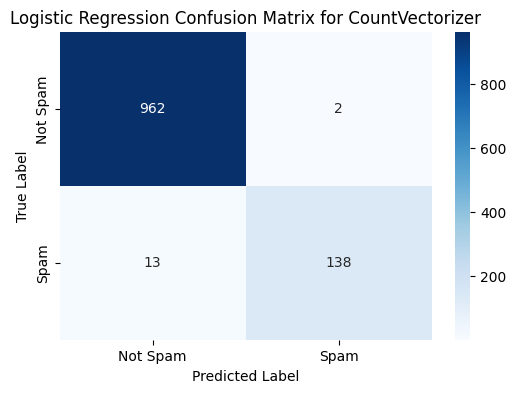

In [10]:
plot_confusion_matrix(Y_test, pred, title="Logistic Regression Confusion Matrix for CountVectorizer")

### Random Forest Model

In [11]:
model = ensemble.RandomForestClassifier(random_state=202)
model.fit(X_train,Y_train)
pred_rf = model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.9865470852017937
[[962   2]
 [ 13 138]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       964
        spam       0.99      0.91      0.95       151

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



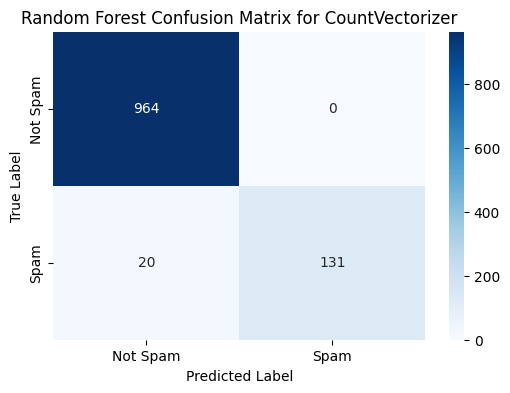

In [12]:
plot_confusion_matrix(Y_test, pred_rf, title="Random Forest Confusion Matrix for CountVectorizer")

## TFIDF Vectorizer

### Vectorization using TFIDFVectorizer and train-test-split

In [13]:
X_tfidf = TfidfVectorizer().fit_transform(X)

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X_tfidf,Y,test_size=0.2,random_state=202)

### Logistic Regression Model

In [15]:
model = linear_model.LogisticRegression(random_state=202)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.9668161434977578
[[964   0]
 [ 37 114]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       964
        spam       1.00      0.75      0.86       151

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



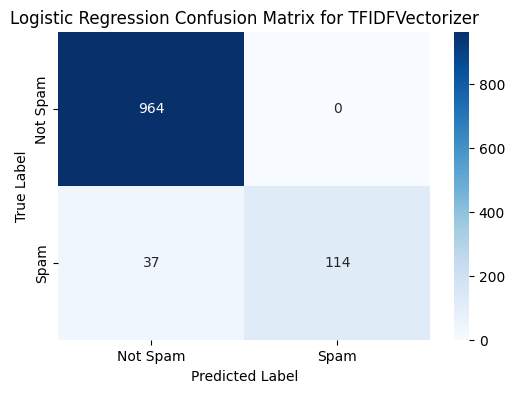

In [16]:
plot_confusion_matrix(Y_test, pred, title="Logistic Regression Confusion Matrix for TFIDFVectorizer")

### Random Forest Classifier

In [17]:
model = ensemble.RandomForestClassifier(random_state=202)
model.fit(X_train,Y_train)
pred_rf = model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.9668161434977578
[[964   0]
 [ 37 114]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       964
        spam       1.00      0.75      0.86       151

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



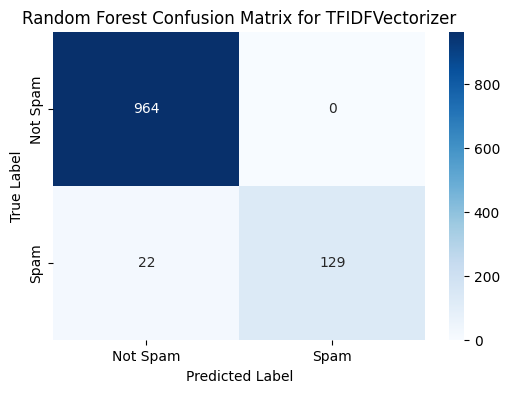

In [18]:
plot_confusion_matrix(Y_test, pred_rf, title="Random Forest Confusion Matrix for TFIDFVectorizer")

## BERT vectorizer

In [27]:
BERTmodel = sentence_transformers.SentenceTransformer('bert-base-nli-mean-tokens')

In [28]:
X_bert = BERTmodel.encode(X)

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X_bert,Y,test_size=0.2,random_state=202)

### Logistic Regression Model

In [30]:
logreg_model = linear_model.LogisticRegression(random_state=202)
logreg_model.fit(X_train,Y_train)
pred = logreg_model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.9919282511210762
[[960   4]
 [  5 146]]
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       964
        spam       0.97      0.97      0.97       151

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



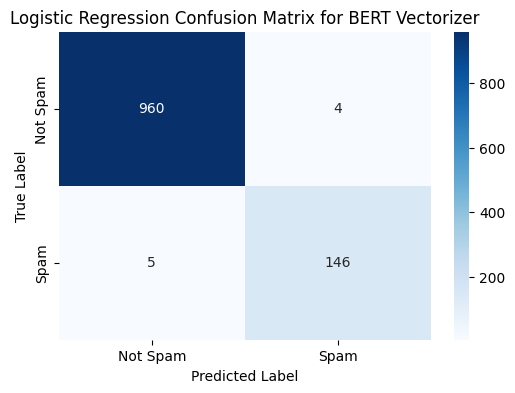

In [23]:
plot_confusion_matrix(Y_test, pred, title="Logistic Regression Confusion Matrix for BERT Vectorizer")

### Random Forest Model

In [24]:
model = ensemble.RandomForestClassifier(random_state=202)
model.fit(X_train,Y_train)
pred_rf = model.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.9919282511210762
[[960   4]
 [  5 146]]
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       964
        spam       0.97      0.97      0.97       151

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



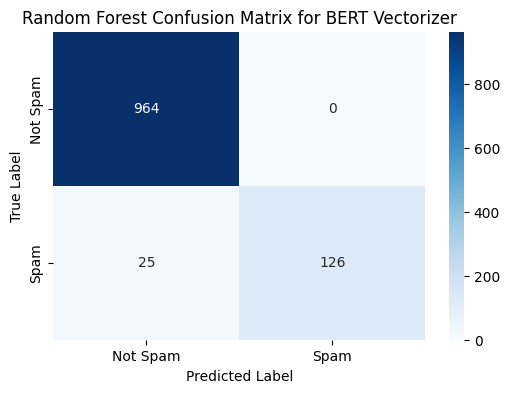

In [25]:
plot_confusion_matrix(Y_test, pred_rf, title="Random Forest Confusion Matrix for BERT Vectorizer")

## Save the best tokenizer and model - BERT Vectorizer and Logistic regression

In [31]:
BERTmodel.save("bert_vectorizer")

In [32]:
import pickle

# Save the Logistic Regression Model
with open("logistic_regression_model.pkl", "wb") as model_file:
    pickle.dump(logreg_model, model_file)

### Test model on new message

In [33]:
from sentence_transformers import SentenceTransformer
# Load BERT vectorizer
bert_model = SentenceTransformer("bert_vectorizer")

# Load the trained Logistic Regression model
with open("logistic_regression_model.pkl", "rb") as model_file:
    classifier = pickle.load(model_file)

# Example: Predict on a new message
def predict_spam(message):
    embedding = bert_model.encode([message])  # Convert text to BERT embedding
    prediction = classifier.predict(embedding)[0]  # Predict spam or not
    return "Spam" if prediction == "spam" else "Not Spam"

print(predict_spam("Congratulations! You won a free prize. Click here!"))

Spam
